In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch

In [15]:
conn = sqlite3.connect("addictions.sqlite3")
c = conn.cursor()

In [21]:
# მონაცემების დამატება ბაზაში
id = int(input("Enter Person's ID: "))
name = input("Enter person's name: ")
age = int(input("Enter person's age: "))
gender = input("Enter person's gender: ")
country = input("Enter the country where the person lives: ")
city = input("Enter person's education level: ")
employment_stat = input("Enter person's employment status: ")
annual_income_usd = float(input("Enter person's annual income (USD): "))
marital_stat = input("Enter person's marital status: ")
children_count = int(input("Enter number of children the person has: "))
smk_per_day = int(input("Enter how many cigarettes the person smokes per day: "))
drk_per_week = int(input("Enter how many times the person drinks per week: "))
smok_age = int(input("Enter age when the person started smoking: "))
dr_age = int(input("Enter age when the person started drinking: "))
attmp_to_qiut = int(input("Enter how many times the person tried to quit smoking: "))
attmp_to_qiut1 = int(input("Enter how many times the person tried to quit drinking: "))
has_healthy_probs = input("Enter 'True' or 'False' if the person has health issues: ").strip().lower() == "true"
mental_stat = input("Enter person's mental health status: ")
exers_freq = input("Enter person's exercise frequency: ")
diet = input("Enter person's diet quality: ")
sleep = int(input("Enter how many hours the person sleeps per night: "))
bmi = float(input("Enter person's Body Mass Index (weight/height^2): "))


c.execute("""
INSERT INTO addiction_population (
    id, name, age, gender, country, city, employment_status, 
    annual_income_usd, marital_status, children_count, smokes_per_day, 
    drinks_per_week, age_started_smoking, age_started_drinking, 
    attempts_to_quit_smoking, attempts_to_quit_drinking, has_health_issues, 
    mental_health_status, exercise_frequency, diet_quality, sleep_hours, bmi
)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", (
    id, name, age, gender, country, city, employment_stat,
    annual_income_usd, marital_stat, children_count,
    smk_per_day, drk_per_week, smok_age, dr_age,
    attmp_to_qiut, attmp_to_qiut1, has_healthy_probs,
    mental_stat, exers_freq, diet, sleep, bmi
))
# ამატებს მონაცემს ბაზაში ყველა პარამეტრის გათვალისწინებით

conn.commit()

Enter Person's ID:  1
Enter person's name:  Giorgi Gogoladze
Enter person's age:  24
Enter person's gender:  Male
Enter the country where the person lives:  Sakartvelo
Enter person's education level:  bachelor
Enter person's employment status:  employeed
Enter person's annual income (USD):  5000
Enter person's marital status:  single
Enter number of children the person has:  0
Enter how many cigarettes the person smokes per day:  8
Enter how many times the person drinks per week:  3
Enter age when the person started smoking:  17
Enter age when the person started drinking:  15
Enter how many times the person tried to quit smoking:  8
Enter how many times the person tried to quit drinking:  0
Enter 'True' or 'False' if the person has health issues:  True
Enter person's mental health status:  Poor
Enter person's exercise frequency:  rarely
Enter person's diet quality:  poor
Enter how many hours the person sleeps per night:  6
Enter person's Body Mass Index (weight/height^2):  20.6


In [22]:
person_id = int(input("Enter the ID of the person you want to update: "))


new_status = input("Enter updated mental health status: ")
new_age = int(input("Enter new age: "))
new_country = input("Enter new country: ")
new_bmi = float(input("Enter new BMI: "))


c.execute("""
UPDATE addiction_population
SET mental_health_status = ?, age = ?, country = ?, bmi = ?
WHERE id = ?
""", (new_status, new_age, new_country, new_bmi, person_id))
# აახლებს იმ ადამიანის მენტალური ჯანმრტელობის სტატუსს, ასაკს, ქვეყანასა და bmi, იმ მინაცემების მიხედვით რომლებსაც მომხმარებელი შეიყვანს

conn.commit()

Enter the ID of the person you want to update:  3001
Enter updated mental health status:  poor
Enter new age:  91
Enter new country:  Albania
Enter new BMI:  19.4


In [23]:
person_id = int(input("Enter the ID of the person you want to delete: "))
c.execute("DELETE FROM addiction_population WHERE id = ?", (person_id,))
# შლის იმ ადამიანის მონაცემებს ბაზიდან რომლის id-ისაც მომხმარებელი შეიყვანს
conn.commit()

Enter the ID of the person you want to delete:  3001


In [5]:
# ----------------------------------სიგარეტსა და ალკოჰოკზე დამოკიდებული ადამიანები სქესის მიხედვით------------------------------
def smokers_by_gender(gender):
    return c.execute("SELECT count(*) FROM addiction_population WHERE gender = ?", (gender,)).fetchone()[0]
# აბრუნებს იმ ადამიანთა რაოდენობას ბაზიდან, რომელთა სქესიც გადაცემული იქნება ფუნქციაში (მდედრობითი/მამრობითი)

fem_smokers = smokers_by_gender("Female")
male_smokers = smokers_by_gender("Male")
print(fem_smokers)
print(male_smokers)

1017
959


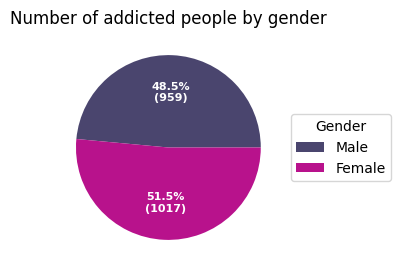

In [6]:
# -------------------------------------დიაგრამა---------------------------------------

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

gender = ["Male",
          "Female"]

data = [male_smokers, fem_smokers]
Gender = [x.split()[-1] for x in gender]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


colors = ["#4a456e", "#b8128c"]
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), colors=colors)

ax.legend(wedges, Gender,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Number of addicted people by gender")

plt.show()

In [9]:
# -------------------------------დამოკიდებულებები ასაკის მიხედვით---------------------------

addicted_teens = c.execute("SELECT count(*) FROM addiction_population WHERE age<20").fetchone()[0]
# პრინტავს იმ ადამიანთა რაოდენობას ბაზიდან, რომელთა ასაკიც 20წელზე ნაკლებია
print(addicted_teens)
addicted_midage = c.execute("SELECT count(*) FROM addiction_population WHERE age<50 AND age>20").fetchone()[0]
# პრინტავს იმ ადამიანთა რაოდენობას ბაზიდან, რომელთა ასაკიც 20წელზე მეტია და 50წელზე ნაკლებია
print(addicted_midage)
addicted_elderly = c.execute("SELECT count(*) FROM addiction_population WHERE age>50").fetchone()[0]
# პრინტავს იმ ადამიანთა რაოდენობას ბაზიდან, რომელთა ასაკიც 50წელზე მეტია
print(addicted_elderly)

239
1369
1303


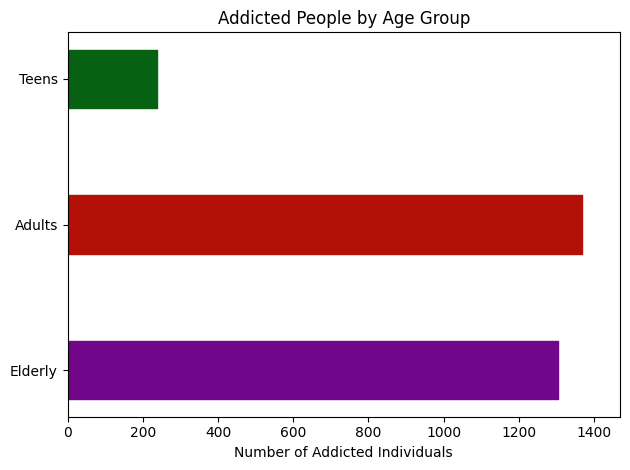

In [10]:
# -------------------------------------დიაგრამა---------------------------------------

teens = [(0, addicted_teens)]
mid_age = [(0, addicted_midage)]
elderly = [(0, addicted_elderly)]

fig, ax = plt.subplots()

ax.broken_barh(teens, (-0.2, 0.4), color="#066113")
ax.broken_barh(mid_age, (0.8, 0.4), color="#b31007")
ax.broken_barh(elderly, (1.8, 0.4), color="#71068a")

ax.set_xlim(0, max(addicted_teens, addicted_midage, addicted_elderly) + 100)
ax.set_yticks(range(3),
              labels=["Teens", "Adults", "Elderly"])
ax.invert_yaxis()
ax.set_title("Addicted People by Age Group")
ax.set_xlabel("Number of Addicted Individuals")

plt.tight_layout()
plt.show()

In [11]:
# ----------------------------------დამოკიდებულები სქესისა ქორწინების სტატუსის მიხედვით--------------------------

def addct_by_gndr_and_merragestat(gender, status):
    return c.execute("SELECT COUNT(*) FROM addiction_population WHERE gender=? AND marital_status=?", (gender,status)).fetchone()[0]
# აბრუნებს ბაზიდან იმ ადამიანების რაოდენობას რომელთა სქესი და ქორწინების სტატუსი გადაცემული იქნება პარამეტრად

married_men = addct_by_gndr_and_merragestat("Male", "Married")
married_women = addct_by_gndr_and_merragestat("Female", "Married")
widowed_men = addct_by_gndr_and_merragestat("Male", "Widowed")
widowed_women = addct_by_gndr_and_merragestat("Female", "Widowed")
divorced_men = addct_by_gndr_and_merragestat("Male", "Divorced")
divorced_women = addct_by_gndr_and_merragestat("Female", "Divorced")



f1= c.execute("SELECT COUNT(*) FROM addiction_population WHERE marital_status='Widowed' AND smokes_per_day<=5 AND gender='Male'").fetchone()[0]
# პრინტავს დაქვრივებული მამაკაცების რაოდენობას, რომლებიც დღეში 5 სიგარეტს, ან ნაკლებს ეწევიან
d1 = c.execute("SELECT COUNT(*) FROM addiction_population WHERE marital_status='Widowed' AND smokes_per_day>5 AND smokes_per_day<=10 AND gender='Male'").fetchone()[0]
# პრინტავს დაქვრივებული მამაკაცების რაოდენობას, რომლებიც დღეში 5 სიგარეტზე მეტს და 10-ზე ნაკლებს ეწევიან
e1 = c.execute("SELECT COUNT(*) FROM addiction_population WHERE marital_status='Widowed' AND smokes_per_day>10 AND gender='Male'").fetchone()[0]
# პრინტავს დაქვრივებული მამაკაცების რაოდენობას, რომლებიც დღეში 10 სიგარეტზე მეტს ეწევიან





print(married_men)
print(married_women)
print(widowed_men)
print(widowed_women)
print(divorced_men)
print(divorced_women)


print(f1,d1,e1)

192
195
208
230
169
211
16 102 90


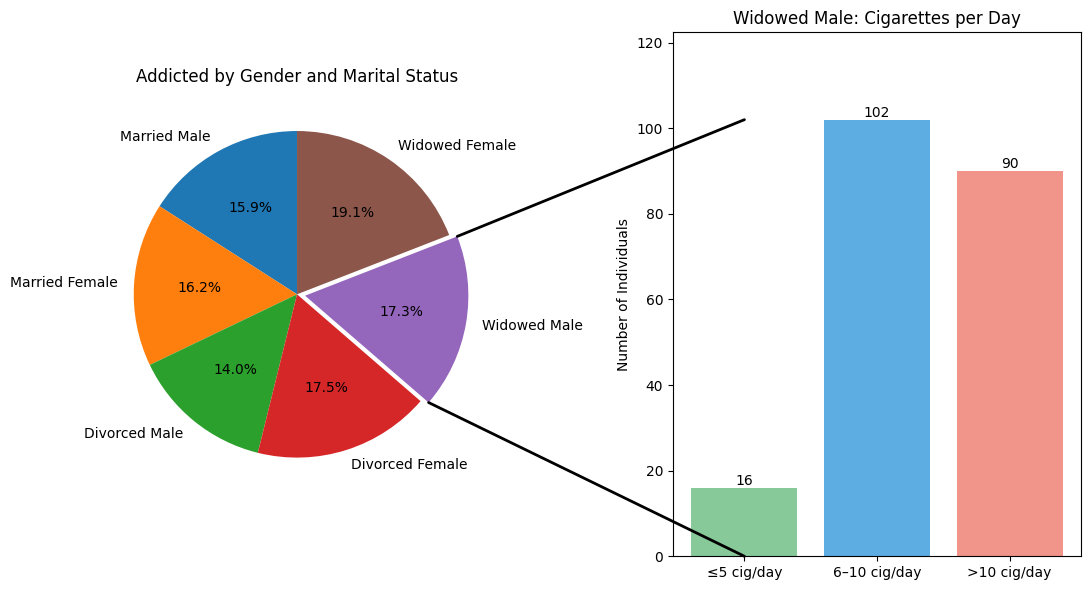

In [12]:
# -------------------------------------დიაგრამა---------------------------------------

labels = [
    "Married Male", "Married Female",
    "Divorced Male", "Divorced Female",
    "Widowed Male", "Widowed Female"
]
values = [
    addct_by_gndr_and_merragestat("Male", "Married"),
    addct_by_gndr_and_merragestat("Female", "Married"),
    addct_by_gndr_and_merragestat("Male", "Divorced"),
    addct_by_gndr_and_merragestat("Female", "Divorced"),
    addct_by_gndr_and_merragestat("Male", "Widowed"),
    addct_by_gndr_and_merragestat("Female", "Widowed")
]

total = sum(values)
ratios = [v / total for v in values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
fig.subplots_adjust(wspace=0)

explode = [0.05 if label == "Widowed Male" else 0 for label in labels]
wedges, *_ = ax1.pie(ratios, labels=labels, autopct='%1.1f%%',
                     startangle=90, explode=explode)
ax1.set_title("Addicted by Gender and Marital Status")

smoke_labels = ["≤5 cig/day", "6–10 cig/day", ">10 cig/day"]
smoke_values = [f1, d1, e1]
colors = ['#88c999', '#5dade2', '#f1948a']

bars = ax2.bar(smoke_labels, smoke_values, color=colors)
ax2.set_title("Widowed Male: Cigarettes per Day")
ax2.set_ylabel("Number of Individuals")
ax2.bar_label(bars, labels=[str(v) for v in smoke_values], label_type='edge')
ax2.set_ylim(0, max(smoke_values) * 1.2)

widowed_male_index = labels.index("Widowed Male")
theta1, theta2 = wedges[widowed_male_index].theta1, wedges[widowed_male_index].theta2
center, r = wedges[widowed_male_index].center, wedges[widowed_male_index].r

x = r * np.cos(np.radians(theta2)) + center[0]
y = r * np.sin(np.radians(theta2)) + center[1]
con = ConnectionPatch(xyA=(0, max(smoke_values)), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData,
                      color='black', linewidth=2)
ax2.add_artist(con)


x = r * np.cos(np.radians(theta1)) + center[0]
y = r * np.sin(np.radians(theta1)) + center[1]
con = ConnectionPatch(xyA=(0, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData,
                      color='black', linewidth=2)
ax2.add_artist(con)

plt.tight_layout()
plt.show()

conn.close()